<a href="https://colab.research.google.com/github/GokulAnnam/ML-DL/blob/main/practiceDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6270939136.0000
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 6270938624.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
7430292447.734253


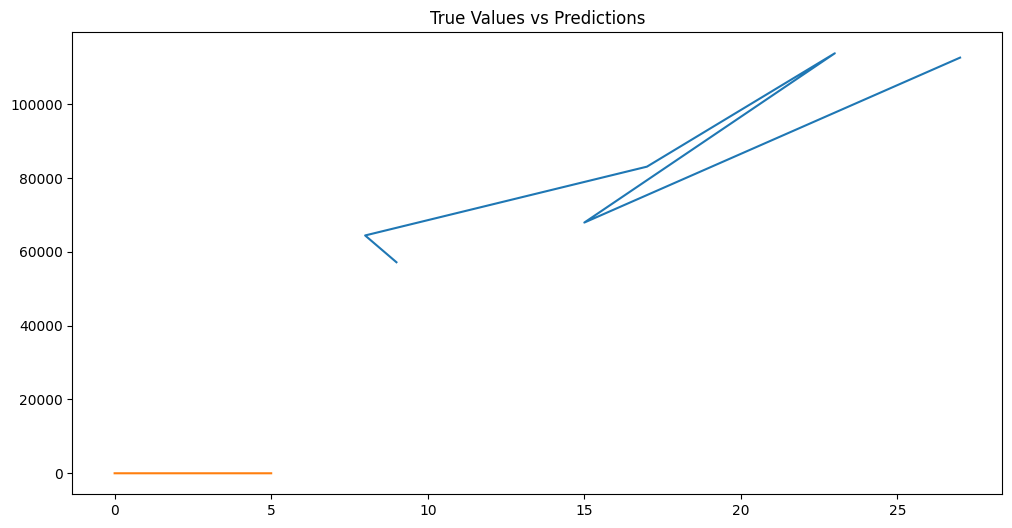

In [ ]:
#week 1- linear regression single variable, week 2 also similar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from sklearn.model_selection import train_test_split

file_path = "/content/Salary_Data_linear_single_variable.csv" #idi oka bokkalo dataset, dont use this in exams
df = pd.read_csv(file_path)

#new dataframes for training purpose
xdf = df[['YearsExperience']]  #storing independent variable in xdf, for multiple variable linear regression we keep multiple variables here
ydf = df['Salary'] #storing dependent variable in ydf

#test train split
xdf_train , xdf_test, ydf_train, ydf_test = train_test_split(xdf,ydf,test_size = 0.2, random_state=42)

#model train
model = Sequential()  #importing model
model.add(Dense(1,activation='linear', input_dim = 1)) #getting model ready with required number of neurons and layers
#in multiple variable, mention number of input variables here in input_dim
model.compile(optimizer = 'adam',loss = 'mean_squared_error') #optimizer is imp as it tells how to update weights and it needs to calculate loss using any loss function so that it tries to reduce that loss in future
model.fit(xdf_train,ydf_train, epochs = 2)

#predict test dataset output and find mse to know how far our model is correct
y_pred = model.predict(xdf_test)
mse = mean_squared_error(y_pred, ydf_test)
print(mse)

#plot graph between predicted and actual target variables
plt.figure(figsize=(12, 6))
plt.plot(ydf_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.title('True Values vs Predictions')
plt.show()




In [ ]:
#week 4, gtts is google text to speech
from gtts import gTTS
from IPython.display import Audio

text_input = "రేపు పరీక్ష అంటా మీ పైనే భారం వేస్తున్నాం"
speech = gTTS(text = text_input, lang = 'te')
speech.save('output.mp3')
Audio('output.mp3')


In [ ]:
#week 3 speech to text
import speech_recognition as sr
audio_path = "/content/harvard.wav"

rec = sr.Recognizer()

with sr.AudioFile(audio_path) as source:
  audio_data = rec.record(source)

output = rec.recognize_google(audio_data)
print(output)


the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al pastor are my favorite a zestful food is the hot cross bun


In [ ]:
!pip install gtts

In [ ]:
#week 5
import cv2
from IPython.display import Image, display
import os

def FrameCapture(path, output_folder="/content/frames", frame_limit=5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    vidObj = cv2.VideoCapture(path)
    count = 0
    success = True

    while success and count < frame_limit:
        success, image = vidObj.read()
        if success:
            frame_path = os.path.join(output_folder, f"frame{count}.jpg")
            cv2.imwrite(frame_path, image)
            display(Image(frame_path))
            count += 1

if __name__ == '__main__':
    FrameCapture("")

Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.7559 - loss: 0.7489 - val_accuracy: 0.9793 - val_loss: 0.0697
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 76s 63ms/step - accuracy: 0.9663 - loss: 0.1194 - val_accuracy: 0.9852 - val_loss: 0.0540
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9806 - loss: 0.0580

Test accuracy: 0.9849
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

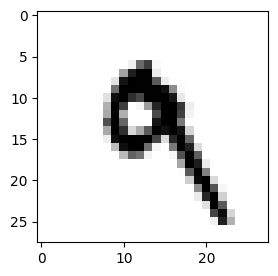

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

''' 60000 is batch size(number of images) in 28x28 pixel size. 1 is dimension for grayscale.
we are converting the integers (0-255) to float as cnn work better on float, and /255 is to normalise all to between (0,1)'''

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

''' to_categorical converts class labels to one-hot encoded vectors. i.e here from integres(0-9) to binary vectors
of length 10. example for 3 is [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'''

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (64,(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')

])

'''1st layer we use 3x3 filter on 28x28, as output we get 26x26 with 32 filters
2nd layer is max pooling of 2x2. so for every 2x2 block we select max value, which reduces size of input, here output we get is 13x13
1st conv layer extracts basic features, next layers extracts more complex features. rule is for extracting general features
(1st layer) we keep less filters. furthur layers we keep more filters(usually double)

next layer is flatten, which converts 3x3x64(after last conv) becomes 576.
'''

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=2, batch_size=64,validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc:.4f}')
predictions = model.predict(test_images)




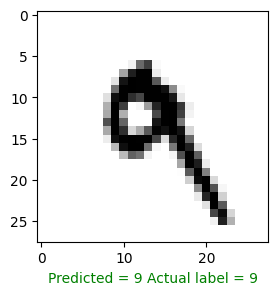

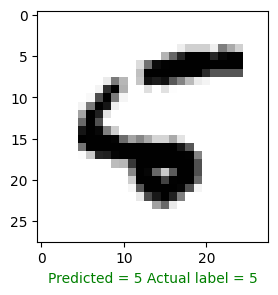

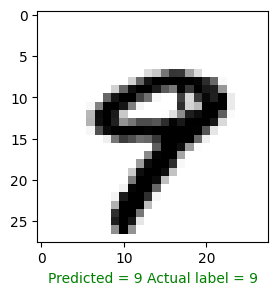

In [ ]:
# Prediction from test labels
for i in range(7, 10):
    plt.figure(figsize=(3, 3))
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])  # Get the predicted class index
    true_label = np.argmax(test_labels[i])  # Convert one-hot encoded label to integer
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'Predicted = {predicted_label} Actual label = {true_label}', color=color)
    plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

corpus = [
    "hello how are you",
    "hello how is your day",
    "hello what are you doing",
    "hi how are you",
    "hi what is your name"
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for sentence in corpus:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

max_seq_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

model = Sequential([
    Embedding(input_dim=total_words, output_dim=10, input_length=max_seq_length-1),
    SimpleRNN(32, return_sequences=False),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=1)

def predict_next_word(seed_text, model, tokenizer, max_seq_length):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted_probs)
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word
    return None

seed_text = "hello how"
predicted_word = predict_next_word(seed_text, model, tokenizer, max_seq_length)
print(f"Predicted next word: {predicted_word}")

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.5095
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.0000e+00 - loss: 2.4984
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.1111 - loss: 2.4876
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1111 - loss: 2.4770
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.1667 - loss: 2.4665
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2222 - loss: 2.4559
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2222 - loss: 2.4453
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2222 - loss: 2.4345
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2222 - loss: 2.4234
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.2222 - loss: 2.4119
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2778 - loss: 2.3999
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accura